# Healthcare

## Problem statement:

Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

### Preliminary analysis

In [1]:
# Import our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

sns.set(style="ticks")

#import check_file as ch

%matplotlib inline

### Understanding data

In [2]:
# Read in our dataset
df = pd.read_csv('healthcare.csv')

# Take a look at the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
#data is clean
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#Select the cell and click on run icon 
df.duplicated().sum()

1

In [6]:
#1 duplicated row
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
#duplicate dropped
df2 = df.drop_duplicates(keep="first")

In [8]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#no more duplicates
df2.duplicated().sum()

0

In [10]:
#one less row because the duplicate row was removed from df2
df2.shape

(302, 14)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
#removing the duplicate row changed count, mean, std, 25%, and 50% by a little
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#Changing variable names
df2.rename({'cp' :'chest_pain_type',
             'trestbps':'resting_blood_pressure', 
             'chol':'cholesterol', 
             'fbs' :'fasting_blood_sugar', 
             'restecg':'resting_ecg',
             'thalach' : 'max_heart_rate',
             'exang':'exercise_induced_angina',
             'oldpeak':'st_depression',
             'slope':'st_slope',
             'ca' : 'major_vessels', 
             'thal' :'thalessimia' },axis = 1, inplace = True)

In [14]:
df3 = df2.copy()

In [15]:
df3.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
#Converting the Numeric Categories to Relevent Descriptors
df2.loc[df2.sex == 0 , 'sex'] = 'female'
df2.loc[df2.sex == 1, 'sex'] = 'male'

df2.loc[df2.chest_pain_type == 0,'chest_pain_type'] = 'typical angina'
df2.loc[df2.chest_pain_type == 1,'chest_pain_type'] = 'atypical angina'
df2.loc[df2.chest_pain_type == 2,'chest_pain_type'] = 'non-anginal pain'
df2.loc[df2.chest_pain_type == 3,'chest_pain_type'] = 'asymptomatic'

df2.loc[df2.fasting_blood_sugar == 0,'fasting_blood_sugar'] = '< 120mg/ml'
df2.loc[df2.fasting_blood_sugar == 1,'fasting_blood_sugar'] = '> 120mg/ml'

df2.loc[df2.resting_ecg == 0, 'resting_ecg']  = 'normal'
df2.loc[df2.resting_ecg == 1 , 'resting_ecg'] = 'abnormal'
df2.loc[df2.resting_ecg == 2 , 'resting_ecg'] = 'hyper'

df2.loc[df2.exercise_induced_angina == 0, 'exercise_induced_angina'] = 'no'
df2.loc[df2.exercise_induced_angina == 1, 'exercise_induced_angina'] = 'yes'

df2.loc[df2.st_slope == 0, 'st_slope'] = 'upsloping'
df2.loc[df2.st_slope == 1, 'st_slope'] = 'flat'
df2.loc[df2.st_slope == 2, 'st_slope'] = 'downsloping'

df2.loc[df2.thalessimia == 1,'thalessimia'] = 'normal'
df2.loc[df2.thalessimia == 2,'thalessimia'] = 'fixed defect'
df2.loc[df2.thalessimia == 3,'thalessimia'] = 'reversable defect'

In [17]:
# percentage of targets that have cvd
df2.target.value_counts(normalize=True)

1    0.543046
0    0.456954
Name: target, dtype: float64

In [18]:
# making dataframes where there is and isn't CVD
cvd1 = df2[df2.target == 1]
cvd0 = df2[df2.target == 0]

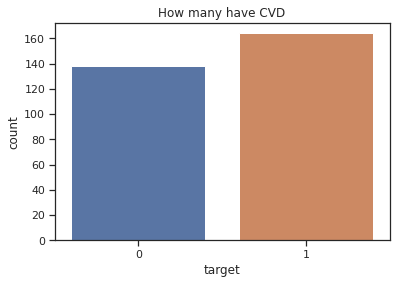

In [19]:
# more people in the dataset have CVD than not
sns.countplot(x='target', data=df2).set(title='How many have CVD')
plt.show()

### Relationships for target variable

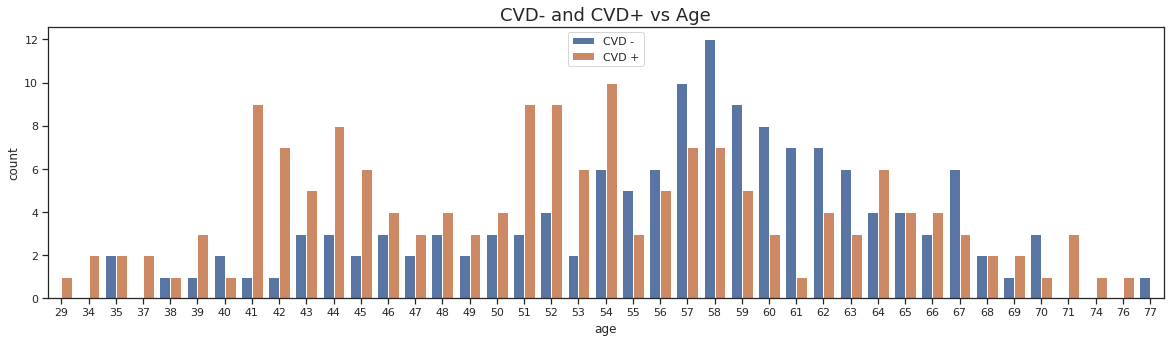

In [20]:
# count of CVD according to age.
plt.figure(figsize = (20,5))
sns.countplot(df2.age, hue = df2.target)
plt.legend(['CVD -','CVD +'])
plt.title('CVD- and CVD+ vs Age', fontsize = 18)
plt.show()

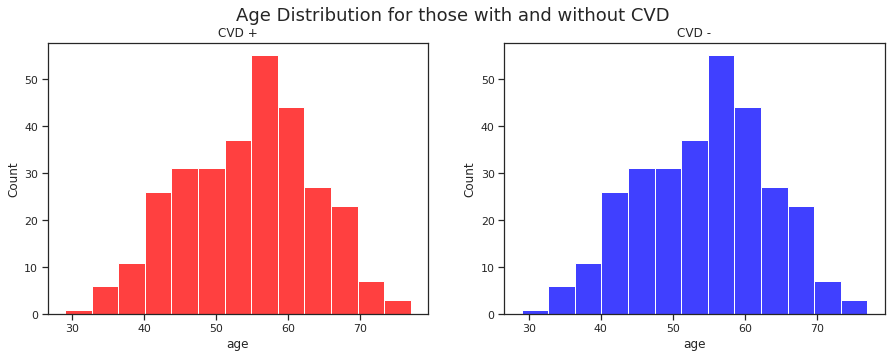

In [21]:
# age distribution for those with and without CVD
x,axes = plt.subplots(1,2, figsize = (15,5))
sns.histplot(df2.age, ax = axes[0], color='red')
sns.histplot(df2.age, ax = axes[1], color='blue')
axes[0].set_title('CVD +')
axes[1].set_title('CVD -')
plt.suptitle('Age Distribution for those with and without CVD',fontsize= 18)
plt.show()

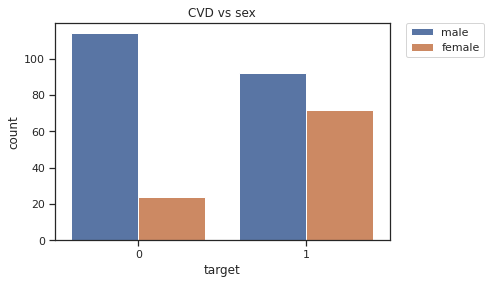

In [22]:
# More of the subjects are male for both with and without CVD
sns.countplot(x='target', hue='sex', data=df2).set(title='CVD vs sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

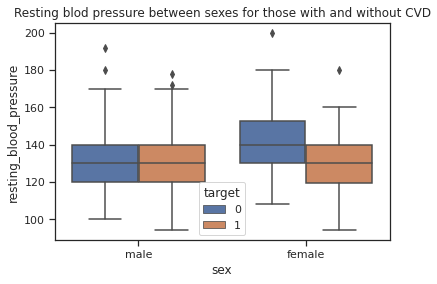

In [23]:
# Blood pressures are pretty similar for those with and without CVD for both genders
sns.boxplot(x = df2.sex,  y = df2.resting_blood_pressure, hue = df2.target).set(title='Resting blod pressure between sexes for those with and without CVD')
plt.show()

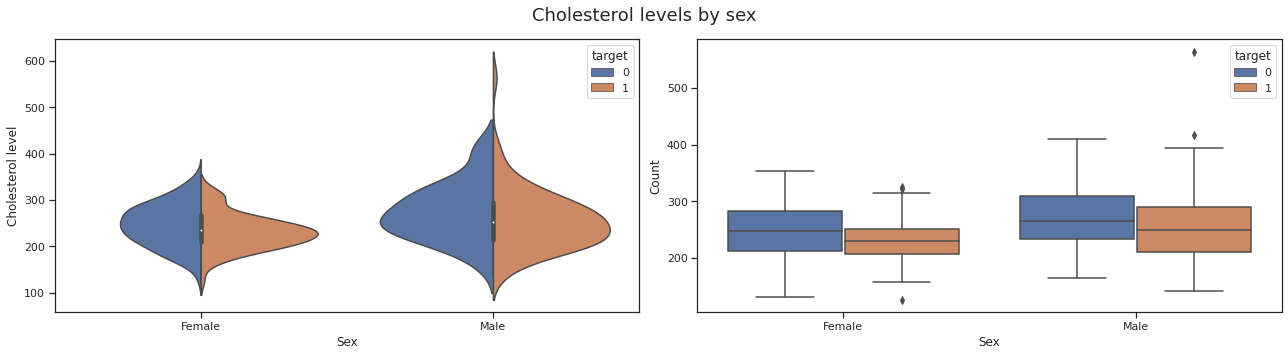

In [24]:
# median blood pressures are about the same for male and female with and without CVD besides some outliers
f,axes = plt.subplots(1,2,figsize = (18,5))
sns.violinplot(y = 'cholesterol', x = 'sex',hue = 'target',data = df2, split = True, ax = axes[0])
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Cholesterol level')
axes[0].set_xticklabels(['Female','Male'])
sns.boxplot(x = df2.sex,  y = df2.cholesterol, hue = df2.target, ax = axes[1])
axes[1].set_xticklabels(['Female','Male'])
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')
plt.suptitle('Cholesterol levels by sex',fontsize= 18)
plt.tight_layout()
plt.show()

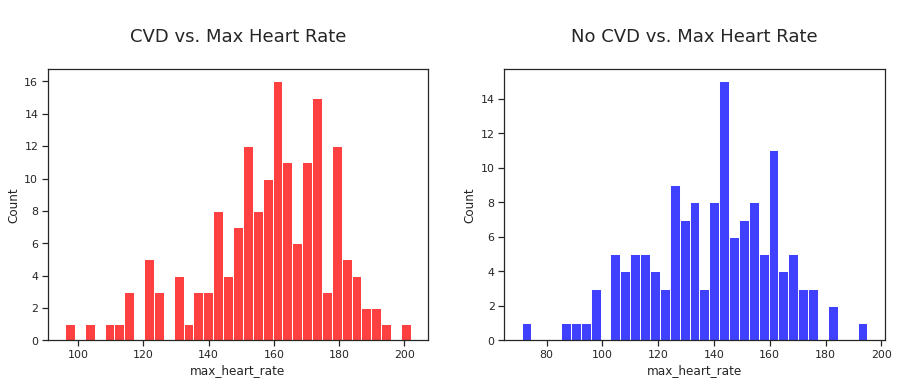

In [25]:
# max heart rate distributions are pretty much the same
x,axes = plt.subplots(1,2, figsize = (15,5))
sns.histplot(cvd1.max_heart_rate, ax = axes[0], kde = False, bins = 35, color='red')
sns.histplot(cvd0.max_heart_rate, ax = axes[1], kde = False, bins = 35, color='blue')
axes[0].set_title('\nCVD vs. Max Heart Rate\n',fontsize= 18)
axes[1].set_title('\nNo CVD vs. Max Heart Rate\n',fontsize= 18)
plt.show()

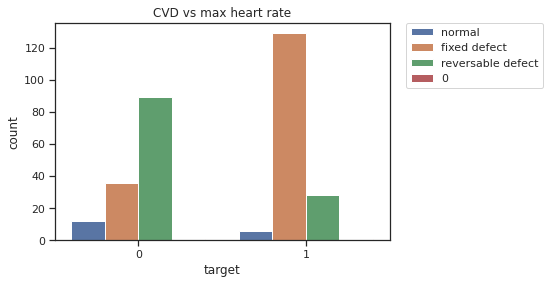

In [26]:
# a lot of fixed defect have CVD opposed to the others
sns.countplot(x='target', hue='thalessimia', data=df2).set(title='CVD vs max heart rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

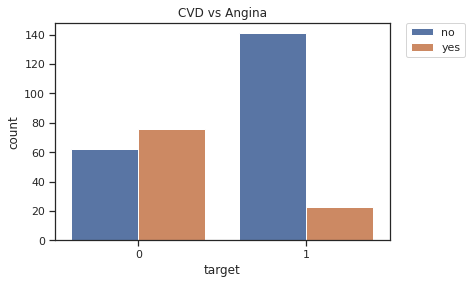

In [27]:
# Angina is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease.
# from this data, not too many of those with angina have CVD
sns.countplot(x='target', hue='exercise_induced_angina', data=df2).set(title='CVD vs Angina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### Correlation between CVD and other factors

In [28]:
#not much correlation (-0.146) between CVD and resting bps
df2.corr().sort_values(by='resting_blood_pressure')

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels,target
target,-0.221476,-0.146269,-0.081437,0.419955,-0.429146,-0.408992,1.000000
max_heart_rate,-0.395235,-0.048023,-0.005308,1.000000,-0.342201,-0.228311,0.419955
major_vessels,0.302261,0.099248,0.086878,-0.228311,0.236560,1.000000,-0.408992
cholesterol,0.207216,0.125256,1.000000,-0.005308,0.050086,0.086878,-0.081437
st_depression,0.206040,0.194600,0.050086,-0.342201,1.000000,0.236560,-0.429146
age,1.000000,0.283121,0.207216,-0.395235,0.206040,0.302261,-0.221476
resting_blood_pressure,0.283121,1.000000,0.125256,-0.048023,0.194600,0.099248,-0.146269


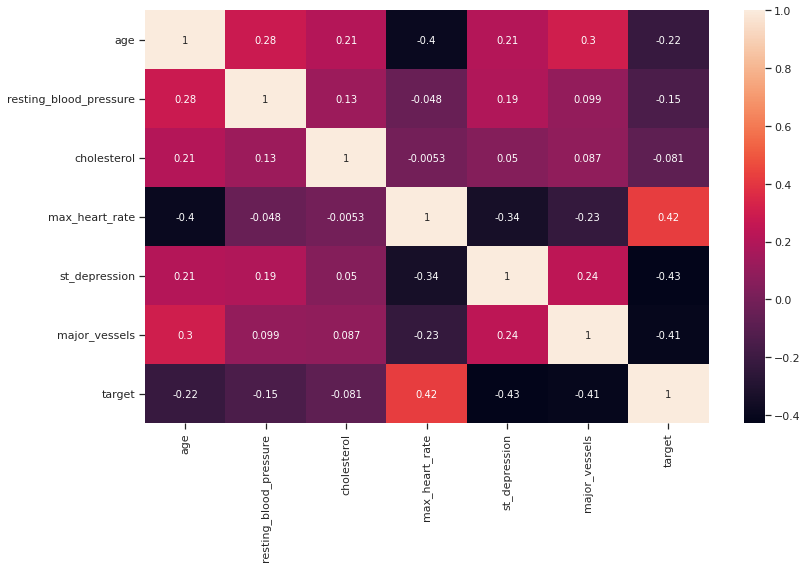

In [29]:
#not much correlation between resting blood pressure and cholesterol with the target variable
#highest correlation is max heart rate
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True)
plt.tight_layout()

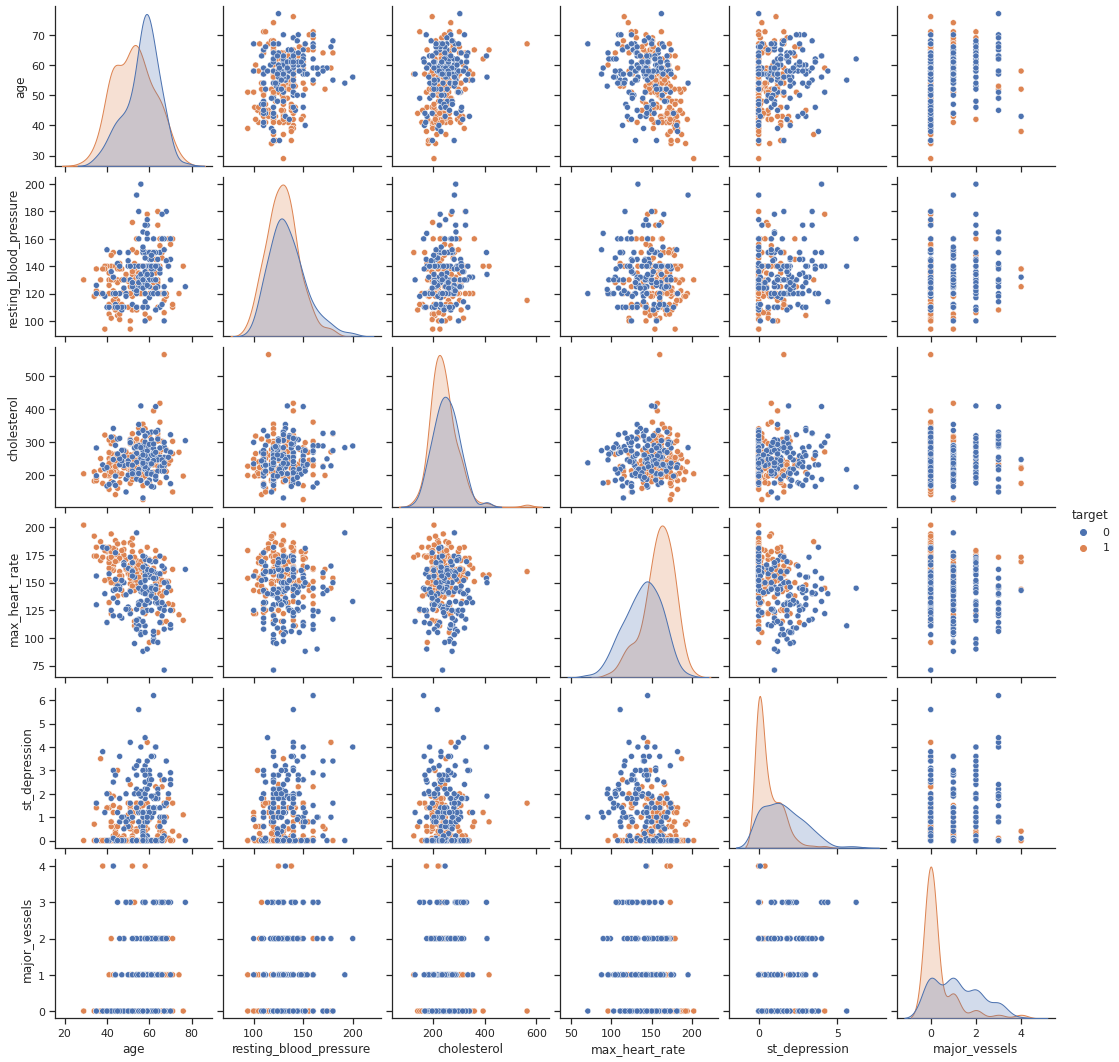

In [30]:
#Pairplot to understand relationships between all given variables
sns.pairplot(df2, hue="target");

In [31]:
#splitting data into train and test
y = df3['target'] 
X = df3.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(241, 13) (61, 13)
(241,) (61,)


In [32]:
scaler = MinMaxScaler()
scaled_train1 = scaler.fit_transform(X)
scaled_train2 = pd.DataFrame(scaled_train1, columns=X.columns, index=X.index)

### Random forest model

In [33]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
#Train the model using the training sets
y_pred=clf.predict(X_test)

In [35]:
#Random forest has 88.5% accuracy in predicting someone has CVD
print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

   Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Random forest classifier

In [36]:
# build a classifier this time using RandomForestClassifier class
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

In [37]:
#Random forest classifier has 84.2% accuracy in predicting someone has CVD
print("Results from Random Search:\n " )
print("-The best score across ALL searched params: ", random_search.best_score_)
print("-The best parameters across ALL searched params:\n ", random_search.best_params_)

cm = confusion_matrix(y_test, rf_preds)
print("\nThe Confusion Matrix:\n", cm)

Results from Random Search:
 
-The best score across ALL searched params:  0.842517006802721
-The best parameters across ALL searched params:
  {'n_estimators': 84, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}

The Confusion Matrix:
 [[26  3]
 [ 5 27]]


### Logistic Regression

In [38]:
# Instantiate the classifier
LogReg = LogisticRegression()

In [39]:
# Train classifier. apply logistic reg to xtrain ytrain
LogReg.fit(X_train, y_train)

LogisticRegression()

In [40]:
#storing pred by classifier
y_predlr = LogReg.predict(X_test)

In [41]:
#compute confusion matrix to find accuracy
metrics.confusion_matrix(y_test, y_pred)

array([[26,  3],
       [ 4, 28]])

In [42]:
#Logistic regression is 88.5% correct if someone has CVD or not. Just as good as random forest
metrics.accuracy_score(y_test, y_pred)

0.8852459016393442

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [44]:
#Apply logistic regression
model_LR = sm.Logit(y_train, X_train)
model_LR = model_LR.fit()

Optimization terminated successfully.
         Current function value: 0.351487
         Iterations 7


In [45]:
# logistic regression summary
model_LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  241
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           12
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.4896
Time:                        02:20:35   Log-Likelihood:                -84.708
converged:                       True   LL-Null:                       -165.95
Covariance Type:            nonrobust   LLR p-value:                 1.639e-28
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0224      0.021      1.053      0.292      -0.019       0.064
sex                        -1.7130      0.511     -3.353      0.001      -2.714      -0.712
chest_pain_type             0.6956      0.202      3.452      0.001       0.301       1.091
resting_blood_pressure     -0.0233      0.011     -2.120      0.034      -0.045      -0.002
cholesterol                -0.0037      0.004     -0.879      0.380      -0.012       0.005
fasting_blood_sugar         0.4790      0.635      0.754      0.451      -0.766       1.724
resting_ecg                 0.6161      0.388      1.587      0.113      -0.145       1.377
max_heart_rate              0.0352      0.010      3.686      0.000       0.016       0.054
exercise_induced_angina    -0.9877      0.453     -2.182      0.029      -1.875      -0.100
st_depression              -0.4177      0.246     -1.700      0.089      -0.899       0.064
st_slope                    0.9236      0.387      2.388      0.017       0.166       1.682
major_vessels              -0.8784      0.243     -3.608      0.000      -1.356      -0.401
thalessimia                -1.0242      0.343     -2.983      0.003      -1.697      -0.351
===========================================================================================
"""

### Decision Tree

In [46]:
# build a classifier
clf_tree = DecisionTreeClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, 5, 7, None],
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
dtree_search = RandomizedSearchCV(clf_tree, param_distributions=param_dist)

# Fit the model on the training data
dtree_search.fit(X_train, y_train)

# Make predictions on the test data
dt_preds = dtree_search.best_estimator_.predict(X_test)

In [47]:
#Decision tree has 79.7% accuracy in predicting someone has CVD
print("Results from Decision Tree:\n " )
print("-The best score across ALL searched params: ", dtree_search.best_score_)
print("-The best parameters across ALL searched params:\n ", dtree_search.best_params_)

cm = confusion_matrix(y_test, dt_preds)
print("\nThe Confusion Matrix:\n", cm)

Results from Decision Tree:
 
-The best score across ALL searched params:  0.797108843537415
-The best parameters across ALL searched params:
  {'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 10, 'max_depth': None, 'criterion': 'entropy'}

The Confusion Matrix:
 [[26  3]
 [12 20]]


### AdaBoostClassifier

In [48]:
# build a classifier for AdaBoostClassifier()
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate

param_dist = {"n_estimators": [10, 100, 200, 400], #50 is default so try low end and high ends
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]} #0.01 is a golden standard 

#trial and error for the parameters. look at webpages or jupyter and see what the parameters are in the help. 


# Run a randomized search over the hyperparameters
ada_search =RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

In [49]:
#AdaBoost has 83.0% accuracy in predicting someone has CVD
print("Results from AdaBoost:\n " )
print("-The best score across ALL searched params: ", ada_search.best_score_)
print("-The best parameters across ALL searched params:\n ", ada_search.best_params_)

cm = confusion_matrix(y_test, ada_preds)
print("\nThe Confusion Matrix:\n", cm)

Results from AdaBoost:
 
-The best score across ALL searched params:  0.8301020408163267
-The best parameters across ALL searched params:
  {'n_estimators': 10, 'learning_rate': 0.3}

The Confusion Matrix:
 [[24  5]
 [ 6 26]]


### Support vector

In [50]:
# build a classifier for support vector machines
clf_svc = SVC()

# Set up the hyperparameter search
# look at setting up your search for C (recommend 0-10 range), 
# kernel, and degree
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_dist = {"C": [0.1, 0.5, 1, 3, 5],
              "kernel": ['linear','rbf']
             }


# Run a randomized search over the hyperparameters
svc_search = RandomizedSearchCV(clf_svc, param_distributions=param_dist)

# Fit the model on the training data
svc_search.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = svc_search.best_estimator_.predict(X_test)

In [51]:
#Support vector has 84.2% accuracy in predicting someone has CVD
print("Results from Support Vector Machines (SVM):\n " )
print("-The best score across ALL searched params: ", svc_search.best_score_)
print("-The best parameters across ALL searched params:\n ", svc_search.best_params_)

cm = confusion_matrix(y_test, svc_preds)
print("\nThe Confusion Matrix:\n", cm)

Results from Support Vector Machines (SVM):
 
-The best score across ALL searched params:  0.8424319727891157
-The best parameters across ALL searched params:
  {'kernel': 'linear', 'C': 0.1}

The Confusion Matrix:
 [[25  4]
 [ 4 28]]


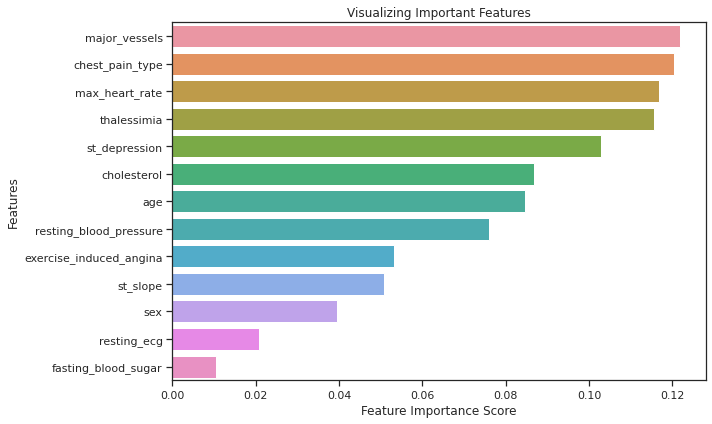

In [52]:
#checking most important features
feature_imp = pd.Series(clf.feature_importances_, index=scaled_train2.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

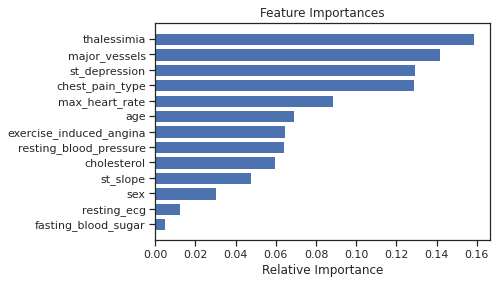

In [53]:
#most important relative features
features = df2.columns[:df2.shape[1]]
importances = random_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');